In [146]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy
from IPython.display import HTML

In [53]:
Image_size=256
Batch_size=32
Channel=3
Epochs=20

In [54]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "p_d",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [55]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [56]:
len(dataset)

68

In [57]:
# here we have 68 dataset and each have 32 in batch

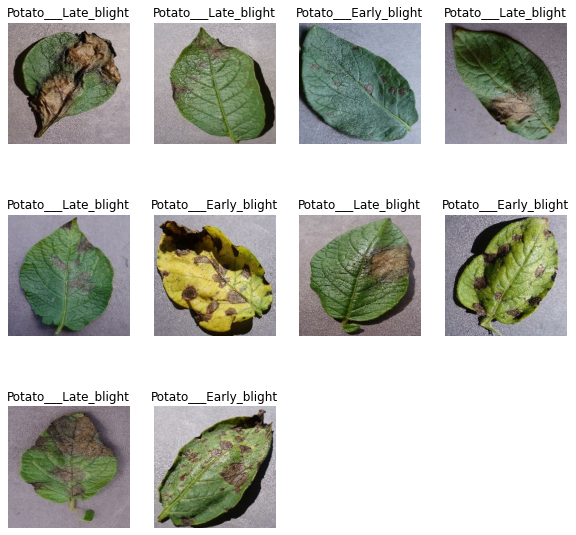

In [58]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [59]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [60]:
train_ds=dataset.take(54)
len(train_ds)

54

In [61]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [62]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [63]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [64]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [65]:
def get_dataset_partition_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    
    return train_ds, val_ds, test_ds

In [66]:
train_ds, val_ds, test_ds=get_dataset_partition_tf(dataset)

In [67]:
len(train_ds)

54

In [68]:
len(val_ds)

6

In [69]:
len(test_ds)

8

In [70]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [71]:
#preprocessing

In [72]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])#it help for resising the image

In [73]:
#data augmentation for train photo in diffrent level
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [74]:
#model building

In [75]:
input_shape=(Batch_size,Image_size,Image_size, Channel)
n_classess = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(63, kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(63, kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(63, (3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(63,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(63,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classess, activation='softmax'),
])
model.build(input_shape=input_shape)

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (32, 125, 125, 63)        18207     
                                                                 
 max_pooling2d_10 (MaxPoolin  (32, 62, 62, 63)         0         
 g2D)                                                 

In [77]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [78]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 [==============================] - 88s 1s/step - loss: 0.9177 - accuracy: 0.4925 - val_loss: 0.8459 - val_accuracy: 0.6667
Epoch 2/20
54/54 [==============================] - 69s 1s/step - loss: 0.6869 - accuracy: 0.6921 - val_loss: 0.8445 - val_accuracy: 0.6458
Epoch 3/20
54/54 [==============================] - 73s 1s/step - loss: 0.4184 - accuracy: 0.8177 - val_loss: 0.2920 - val_accuracy: 0.8854
Epoch 4/20
54/54 [==============================] - 81s 1s/step - loss: 0.3052 - accuracy: 0.8854 - val_loss: 0.2761 - val_accuracy: 0.8698
Epoch 5/20
54/54 [==============================] - 80s 1s/step - loss: 0.2553 - accuracy: 0.8976 - val_loss: 0.2651 - val_accuracy: 0.8802
Epoch 6/20
54/54 [==============================] - 76s 1s/step - loss: 0.1945 - accuracy: 0.9248 - val_loss: 0.1035 - val_accuracy: 0.9844
Epoch 7/20
54/54 [==============================] - 73s 1s/step - loss: 0.2308 - accuracy: 0.9080 - val_loss: 0.4170 - val_accuracy: 0.8698
Epoch 8/20
54/54 [==

In [80]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 381ms/step - loss: 0.2645 - accuracy: 0.9375


In [81]:
scores

[0.26451462507247925, 0.9375]

In [82]:
history

In [83]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [88]:
print(len(history.history['accuracy']))
history.history['accuracy']

20


[0.49247685074806213,
 0.6921296119689941,
 0.8177083134651184,
 0.8854166865348816,
 0.8975694179534912,
 0.9247685074806213,
 0.9079861044883728,
 0.9351851940155029,
 0.9560185074806213,
 0.9357638955116272,
 0.9583333134651184,
 0.9571759104728699,
 0.9594907164573669,
 0.9722222089767456,
 0.9664351940155029,
 0.9774305820465088,
 0.9461805820465088,
 0.9722222089767456,
 0.9756944179534912,
 0.9866898059844971]

In [89]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

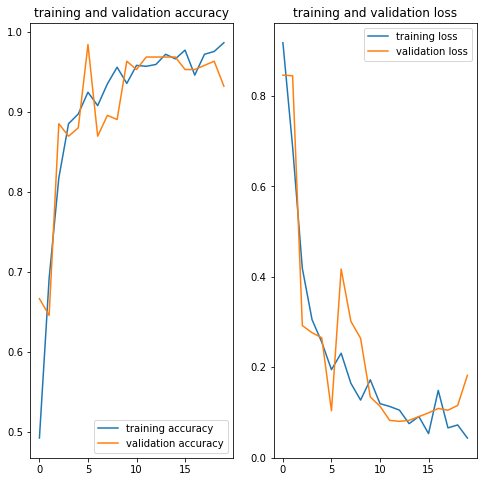

In [92]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label="training accuracy")
plt.plot(range(Epochs),val_acc,label="validation accuracy")
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label="training loss")
plt.plot(range(Epochs),val_loss,label="validation loss")
plt.legend(loc='upper right')
plt.title('training and validation loss')



In [93]:
import numpy as np

In [94]:
#prediction testing

first image to predict
actua label: Potato___Late_blight
predicted label: Potato___Late_blight


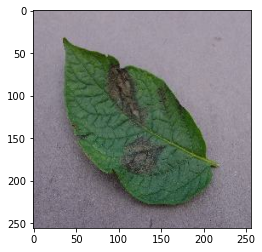

In [108]:
for image_batch, label_batch in test_ds.take(1):
    
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actua label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [109]:
batch_prediction[0]

array([2.0395135e-04, 9.9979407e-01, 2.0587563e-06], dtype=float32)

In [110]:
np.argmax([1.7922450e-11, 1.2413677e-03, 9.9875867e-01])

2

In [112]:
#prediction 
print(class_names[np.argmax(batch_prediction[0])])

Potato___Late_blight


In [143]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0)# create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return prediction_class,confidence
#predicting class and confidence

In [138]:
import cv2
import matplotlib.pyplot as plt

In [148]:
#model saving

In [155]:
from keras.models import load_model
model.save("potato_desease_detection.h5")

In [156]:
model_version=1
model.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/1\assets


In [152]:
#--------------------------------#